## Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Get the data - features and **target**

In [20]:
import os
from pathlib import Path

# Load data
path = Path(os.getcwd() + "/..").resolve()
dataset_path = path/'Datasets/Tabular/FOOD-DATA-GROUP.csv'
df = pd.read_csv(dataset_path)
print(dataset_path)

df = df.drop("food", axis=1)
features = df.drop("Caloric Value", axis=1).columns.tolist()
target = "Caloric Value"

/Users/yashicajain/Documents/F21DL/Coursework/CourseWork/Datasets/Tabular/FOOD-DATA-GROUP.csv


The data is skewed. Transformation is needed to get a more normally distributed data.

## Yeo-Johnson transformation

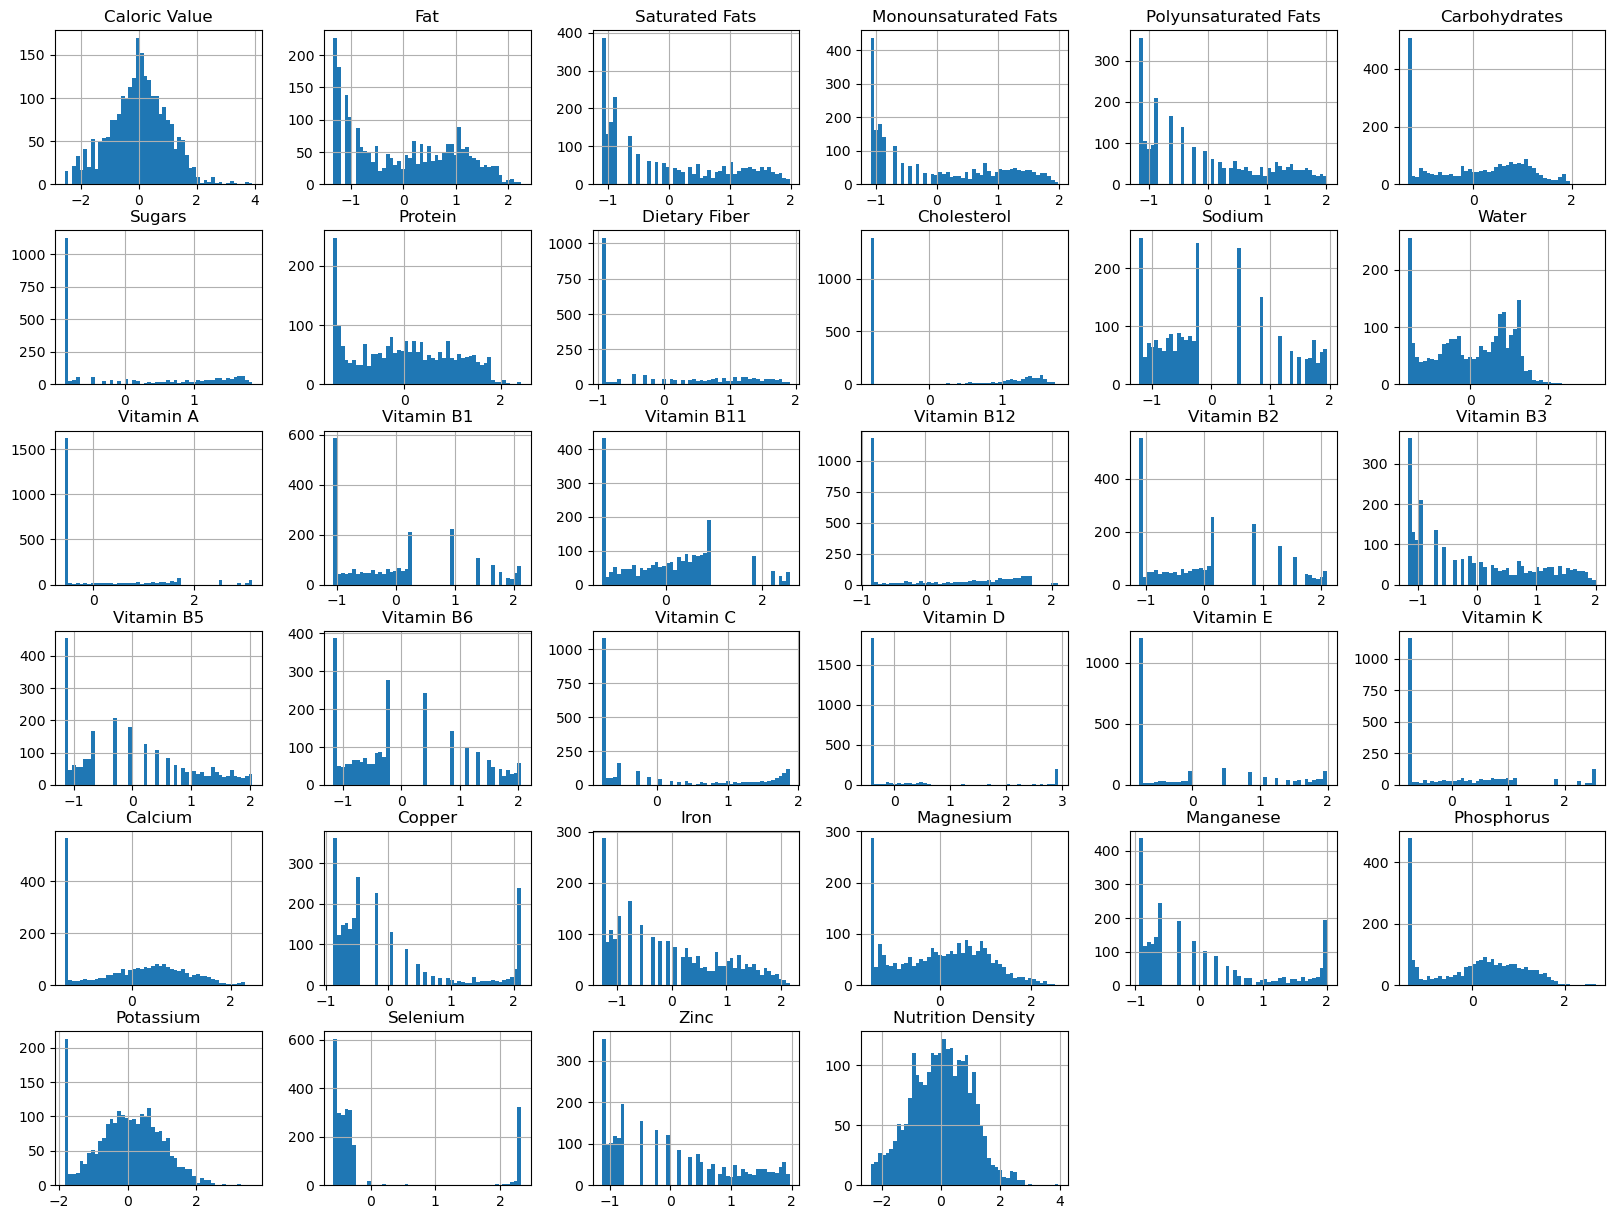

In [22]:
from sklearn.preprocessing import PowerTransformer

# Initialize the PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)

# Transform the data
df_transformed = pt.fit_transform(df)

# Convert back to DataFrame
df = pd.DataFrame(df_transformed, columns=df.columns)

# Visualizing the transformed data
df.hist(bins=50, figsize=(20,15))
plt.show()

Find correlation between features and target
## Pearson's correlation coefficient

In [ ]:
corr = df.corr()[target].sort_values(ascending=False)[1:]

# Absolute for positive values
abs_corr = abs(corr)

# Consider all features with more than 0.1 correlation with the target
relevant_features = abs_corr[abs_corr>0.1]
new_df = df[relevant_features.index]
features = new_df.columns.tolist()

print(features)


## Feature Extraction


### Create features manually

In [ ]:
df['Protein+Carbohydrates+Fat'] = df['Protein']+df['Carbohydrates']+df['Fat']
df['Total Fats'] = df['Polyunsaturated Fats'] + df['Saturated Fats'] + df['Monounsaturated Fats']

new_features = ['Protein+Carbohydrates+Fat', 'Total Fats']

### Correlation matrix

In [ ]:
import numpy as np
X = df[features + new_features]
y = df[target]
feature_names = np.array(X.columns)
corr = df[np.concatenate((feature_names, [target]))].corr()

import matplotlib.pyplot as plt
import seaborn as sns

### Heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Remove features correlated with other features

In [ ]:
features = ['Nutrition Density', 'Zinc', 'Vitamin B3', 'Vitamin B1', 'Vitamin B6', 'Calcium', 'Cholesterol', 'Sodium', 'Water', 'Dietary Fiber', 'Sugars', 'Vitamin C', 'Selenium' ]

### Extract top 10 features

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import root_mean_squared_error, r2_score

feature_selector = SequentialFeatureSelector(
       LinearRegression(),
       n_features_to_select=10,
       direction="backward",
       scoring="neg_root_mean_squared_error",
       tol=-1e-4,
       n_jobs=-1,
)
model = make_pipeline(feature_selector, LinearRegression())
model.fit(X, y)
selected_features = feature_selector.get_support()
print(f"Features selected: {feature_names[selected_features]}")

predictions = model.predict(X)
mse = root_mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f"Root Mean Squared Error: {mse:.3f}")
print(f"R² Score: {r2:.3f}")